## 1. Setup

In [1]:
# Check execution environment
import sys
from pathlib import Path

# Add src to path for imports
project_root = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
sys.path.insert(0, str(project_root))

print(f"Project root: {project_root}")
print(f"Working directory: {Path.cwd()}")

Project root: /home/miguel/Desktop/MCIM/Projects/MCIM_Final_Project
Working directory: /home/miguel/Desktop/MCIM/Projects/MCIM_Final_Project/notebooks


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import warnings
warnings.filterwarnings('ignore')

# Import preprocessing utilities
from src.data.preprocessing import preprocess_dataset

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✓ All modules imported successfully!")

✓ All modules imported successfully!


In [3]:
# Load configuration
config_path = project_root / 'configs' / 'data_config.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

print("Configuration loaded:")
print("="*60)
print(f"  Projection Strategy: {config['projection_strategy']}")
print(f"  Text Source: {config['text_source']}")
print(f"  Max Censoring Ratio: {config['max_censoring_ratio']}")
print(f"  Min Vocab Frequency: {config['min_vocab_freq']}")
print(f"  Train/Val/Test Split: {config['splits']['train']}/{config['splits']['val']}/{config['splits']['test']}")
print(f"  Random Seed: {config['random_seed']}")
print("="*60)

Configuration loaded:
  Projection Strategy: first_frontal
  Text Source: impression
  Max Censoring Ratio: 0.3
  Min Vocab Frequency: 5
  Train/Val/Test Split: 0.8/0.1/0.1
  Random Seed: 42


## 2. Run Preprocessing Pipeline

This cell runs the complete preprocessing pipeline:
- Filters censored reports
- Applies first-frontal strategy
- Splits data by patient ID
- Builds vocabulary on training data ONLY
- Saves all outputs to `data/processed/`

In [4]:
# Define output directory
output_dir = project_root / 'data' / 'processed'

# Run preprocessing (this will create variant-specific subdirectory automatically)
manifest = preprocess_dataset(config_path, output_dir)

# Get the variant directory that was created
variant_name = f"{config['projection_strategy']}_{config['text_source']}"
variant_dir = output_dir / variant_name

print(f"\n✓ Preprocessing variant: {variant_name}")
print(f"✓ Output directory: {variant_dir}")

MEDICAL IMAGE CAPTIONING - DATA PREPROCESSING

[1/7] Loading raw data...
  ✓ Loaded 7466 image-report pairs
  ✓ Unique patients: 3851

[2/7] Applying projection strategy: first_frontal
  ✓ Selected 3689 images (one per patient)

[3/7] Analyzing text censoring...
  ✓ Mean censoring ratio: 0.014
  ✓ Median censoring ratio: 0.000

[4/7] Filtering reports (max_censoring_ratio=0.3)...
  ✓ Removed 3 heavily censored reports (0.1%)
  ✓ Remaining: 3686 patients

[5/7] Splitting data (patient-level)...
  ✓ Train: 2948 patients
  ✓ Val:   368 patients
  ✓ Test:  370 patients

[6/7] Building vocabulary (training data only, min_freq=5)...
  • Removing censoring tokens (XXXX, x-XXXX, etc.)...
  ✓ All censoring tokens removed from 2924 training texts
  ✓ Vocabulary size: 514 tokens
  ✓ Total unique tokens in training: 1367
  ✓ Confirmed: No 'xxxx' token in vocabulary

[7/7] Saving processed data...
  • Preprocessing variant: first_frontal_impression
  • Output directory: /home/miguel/Desktop/MCIM/Pr

## 3. Verify Processed Data

Load and inspect the processed splits to ensure everything looks correct.

In [5]:
# Load processed splits from variant directory
train_df = pd.read_csv(variant_dir / 'train.csv')
val_df = pd.read_csv(variant_dir / 'val.csv')
test_df = pd.read_csv(variant_dir / 'test.csv')

print("Processed Data Shapes:")
print(f"  Train: {train_df.shape}")
print(f"  Val:   {val_df.shape}")
print(f"  Test:  {test_df.shape}")

print("\nTrain Data Sample:")
display(train_df.head())

Processed Data Shapes:
  Train: (2948, 12)
  Val:   (368, 12)
  Test:  (370, 12)

Train Data Sample:


,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression,censoring_ratio,split
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edem...,Normal chest x-XXXX.,0.25,train
1,3,3_IM-1384-1001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XXXX. Pain to R back, R elbow and R rib XXXX, no pre...",NaN,NaN,"No displaced rib fractures, pneumothorax, or pleural effusion identified. Well-expanded and clea...",0.00,train
2,4,4_IM-2050-1001.dcm.png,Frontal,"Pulmonary Disease, Chronic Obstructive;Bullous Emphysema;Pulmonary Fibrosis/interstitial;Cicatri...","Pulmonary Disease, Chronic Obstructive;Bullous Emphysema;Pulmonary Fibrosis;Cicatrix;Opacity;Opa...","PA and lateral views of the chest XXXX, XXXX at XXXX hours",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and alveolar opacities consistent with chronic obstruct...,"1. Bullous emphysema and interstitial fibrosis. 2. Probably scarring in the left apex, although ...",0.00,train
3,6,6_IM-2192-1001.dcm.png,Frontal,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within normal limits. There is no focal airspace consolid...,No acute cardiopulmonary findings.,0.00,train
4,7,7_IM-2263-1001.dcm.png,Frontal,Pulmonary Atelectasis/base;Spondylosis/thoracic vertebrae;Arthritis/cervical vertebrae,Pulmonary Atelectasis;Spondylosis;Arthritis,Xray Chest PA and Lateral,Preop lumbar surgery,"XXXX, XXXX",The cardiac contours are normal. XXXX basilar atelectasis. The lungs are clear. Thoracic spondyl...,Basilar atelectasis. No confluent lobar consolidation or pleural effusion.,0.00,train


In [6]:
# Verify no patient overlap between splits
train_patients = set(train_df['uid'])
val_patients = set(val_df['uid'])
test_patients = set(test_df['uid'])

overlap_train_val = train_patients & val_patients
overlap_train_test = train_patients & test_patients
overlap_val_test = val_patients & test_patients

print("Patient Overlap Check:")
print(f"  Train ∩ Val:  {len(overlap_train_val)} patients (should be 0)")
print(f"  Train ∩ Test: {len(overlap_train_test)} patients (should be 0)")
print(f"  Val ∩ Test:   {len(overlap_val_test)} patients (should be 0)")

if len(overlap_train_val) == 0 and len(overlap_train_test) == 0 and len(overlap_val_test) == 0:
    print("\n✓ No patient overlap - data splitting is correct!")
else:
    print("\n✗ ERROR: Patient overlap detected!")

Patient Overlap Check:
  Train ∩ Val:  0 patients (should be 0)
  Train ∩ Test: 0 patients (should be 0)
  Val ∩ Test:   0 patients (should be 0)

✓ No patient overlap - data splitting is correct!


## 4. Inspect Vocabulary

Check the vocabulary built from training data only.

In [7]:
# Load vocabulary from variant directory
vocab_df = pd.read_csv(variant_dir / 'vocabulary.txt', sep='\t')

print(f"Vocabulary Statistics:")
print(f"  Total tokens: {len(vocab_df)}")
print(f"  Special tokens: {vocab_df[vocab_df['token'].str.contains('<')]['token'].tolist()}")

print("\nTop 30 most frequent tokens:")
display(vocab_df.nlargest(30, 'count'))

Vocabulary Statistics:
  Total tokens: 514
  Special tokens: ['<PAD>', '<START>', '<END>', '<UNK>']

Top 30 most frequent tokens:


,token,index,count
4,no,4,2410
5,acute,5,1774
6,cardiopulmonary,6,1231
7,disease,7,805
8,of,8,717
9,the,9,649
10,abnormality,10,626
11,and,11,445
12,normal,12,423
13,right,13,421


In [8]:
# Check for problematic tokens
problematic_tokens = ['xxxx', 'XXXX']

found_problematic = vocab_df[vocab_df['token'].isin(problematic_tokens)]

if len(found_problematic) > 0:
    print("⚠️  Warning: Problematic tokens found in vocabulary:")
    display(found_problematic)
    print("\nThis suggests censoring filter may need adjustment.")
else:
    print("✓ No problematic censoring tokens found in vocabulary!")

✓ No problematic censoring tokens found in vocabulary!


## 5. Visualize Data Distribution

✓ Saved to: /home/miguel/Desktop/MCIM/Projects/MCIM_Final_Project/data/processed/first_frontal_impression/split_distribution.png


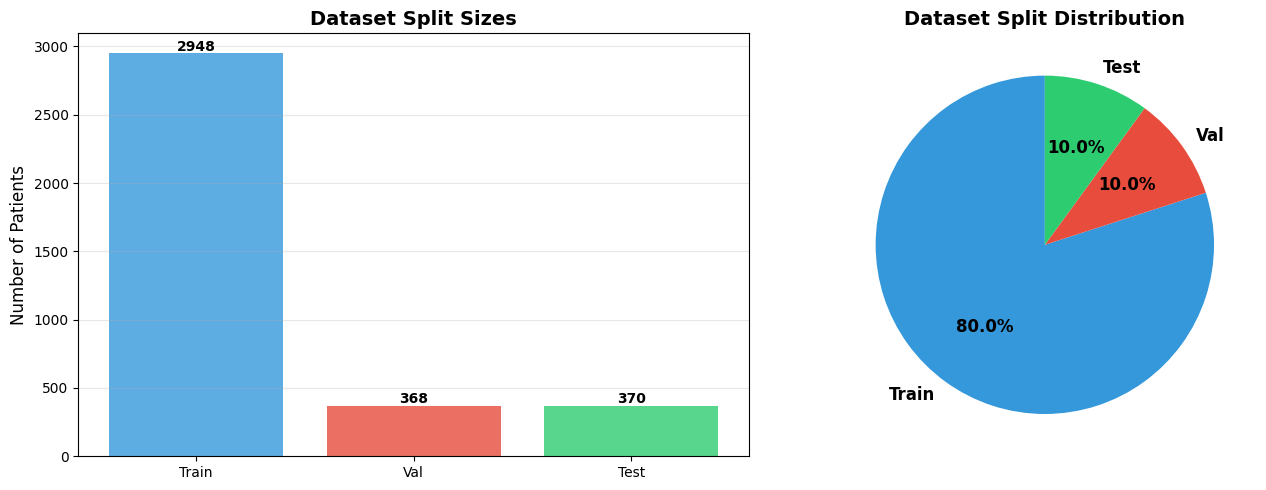

In [9]:
# Plot split sizes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
split_sizes = [len(train_df), len(val_df), len(test_df)]
split_labels = ['Train', 'Val', 'Test']
colors = ['#3498db', '#e74c3c', '#2ecc71']

axes[0].bar(split_labels, split_sizes, color=colors, alpha=0.8)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Dataset Split Sizes', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (label, size) in enumerate(zip(split_labels, split_sizes)):
    axes[0].text(i, size + 20, str(size), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(split_sizes, labels=split_labels, colors=colors, autopct='%1.1f%%',
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
save_path = variant_dir / 'split_distribution.png'
save_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved to: {save_path}")
plt.show()

✓ Saved to: /home/miguel/Desktop/MCIM/Projects/MCIM_Final_Project/data/processed/first_frontal_impression/censoring_by_split.png


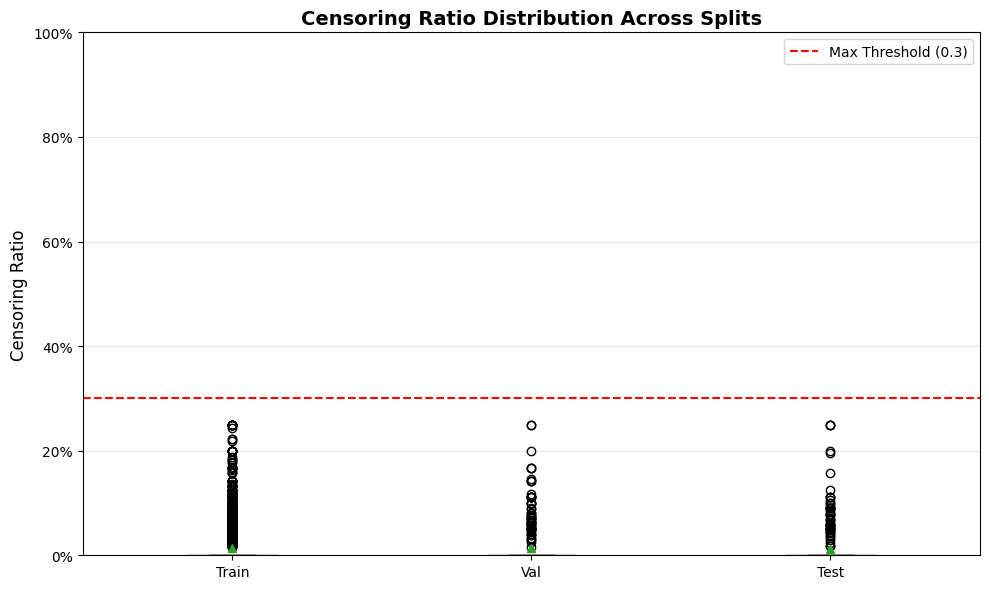

In [10]:
# Plot censoring distribution across splits
fig, ax = plt.subplots(figsize=(10, 6))

data_to_plot = [
    train_df['censoring_ratio'],
    val_df['censoring_ratio'],
    test_df['censoring_ratio']
]

bp = ax.boxplot(data_to_plot, labels=['Train', 'Val', 'Test'],
                patch_artist=True, showmeans=True)

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_ylabel('Censoring Ratio', fontsize=12)
ax.set_title('Censoring Ratio Distribution Across Splits', fontsize=14, fontweight='bold')
ax.axhline(y=config['max_censoring_ratio'], color='red', linestyle='--',
           label=f"Max Threshold ({config['max_censoring_ratio']})")

# Set y-axis to show full 0-100% range
ax.set_ylim(0, 1.0)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
save_path = variant_dir / 'censoring_by_split.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved to: {save_path}")
plt.show()

## 6. Review Preprocessing Manifest

In [11]:
# Display manifest summary
print("Preprocessing Manifest Summary:")
print("="*70)

print("\n📊 Dataset Statistics:")
print(f"  Raw data: {manifest['dataset_statistics']['raw_data']['total_image_report_pairs']} image-report pairs")
print(f"  After projection strategy: {manifest['dataset_statistics']['after_projection_strategy']['selected_images']} images")
print(f"  After censoring filter: {manifest['dataset_statistics']['after_censoring_filter']['remaining_patients']} patients")
print(f"  Removed: {manifest['dataset_statistics']['after_censoring_filter']['removed_patients']} patients ({manifest['dataset_statistics']['after_censoring_filter']['removal_rate']})")

print("\n📂 Data Splits:")
for split_name, split_info in manifest['dataset_statistics']['splits'].items():
    print(f"  {split_name.capitalize()}: {split_info['patients']} patients ({split_info['percentage']})")

print("\n📖 Vocabulary Statistics:")
print(f"  Vocabulary size: {manifest['vocabulary_statistics']['vocab_size']} tokens")
print(f"  Unique tokens in training: {manifest['vocabulary_statistics']['total_unique_tokens_in_training']}")
print(f"  Coverage: {manifest['vocabulary_statistics']['coverage']}")
print(f"  Contains 'xxxx' token: {manifest['vocabulary_statistics']['contains_xxxx_token']}")

print("\n📄 Output Files:")
for file_type, filename in manifest['output_files'].items():
    print(f"  • {filename}")

print("\n" + "="*70)
print("✓ Preprocessing pipeline completed successfully!")
print("✓ No data leakage: Vocabulary built on training data only")
print("✓ Ready for model training")

Preprocessing Manifest Summary:

📊 Dataset Statistics:
  Raw data: 7466 image-report pairs
  After projection strategy: 3689 images
  After censoring filter: 3686 patients
  Removed: 3 patients (0.08%)

📂 Data Splits:
  Train: 2948 patients (79.98%)
  Val: 368 patients (9.98%)
  Test: 370 patients (10.04%)

📖 Vocabulary Statistics:
  Vocabulary size: 514 tokens
  Unique tokens in training: 1367
  Coverage: 94.84%
  Contains 'xxxx' token: False

📄 Output Files:
  • train.csv
  • val.csv
  • test.csv
  • vocabulary.txt
  • preprocessing_manifest.json

✓ Preprocessing pipeline completed successfully!
✓ No data leakage: Vocabulary built on training data only
✓ Ready for model training


## 7. Preprocess All Variants (Optional)

Run all 8 combinations of preprocessing parameters:
- Projection: `first_frontal`, `pairs`
- Text source: `impression`, `findings`
- Min vocab freq: `3`, `5`

This will create 8 separate folders in `data/processed/`.

In [3]:
# Run preprocessing script for all variants
import subprocess

script_path = project_root / 'scripts' / 'preprocess_all_variants.py'

print("Running preprocessing for all 8 variants...")
print()

result = subprocess.run(
    ['python', str(script_path)],
    cwd=str(project_root),
    capture_output=False,
    text=True
)

if result.returncode == 0:
    print("\nAll variants preprocessed successfully!")
else:
    print(f"\nPreprocessing failed with exit code: {result.returncode}")

Running preprocessing for all 8 variants...

PREPROCESSING ALL VARIANTS
Total variants to process: 8


[1/8] Processing: first_frontal_impression_3
--------------------------------------------------------------------------------
MEDICAL IMAGE CAPTIONING - DATA PREPROCESSING

[1/7] Loading raw data...
  ✓ Loaded 7466 image-report pairs
  ✓ Unique patients: 3851

[2/7] Applying projection strategy: first_frontal
  ✓ Selected 3689 images (one per patient)

[3/7] Analyzing text censoring...
  ✓ Mean censoring ratio: 0.014
  ✓ Median censoring ratio: 0.000

[4/7] Filtering reports (max_censoring_ratio=0.3)...
  ✓ Removed 3 heavily censored reports (0.1%)
  ✓ Remaining: 3686 patients

[5/7] Splitting data (patient-level)...
  ✓ Train: 2948 patients
  ✓ Val:   368 patients
  ✓ Test:  370 patients

[6/7] Building vocabulary (training data only, min_freq=3)...
  • Removing censoring tokens (XXXX, x-XXXX, etc.)...
  ✓ All censoring tokens removed from 2924 training texts
  ✓ Vocabulary size: 693